Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [37]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp', u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn', u'marstat', u'fmarstat', u'fmarit', u'evrmarry', u'hisp', u'hispgrp', u'numrace', u'roscnt', u'hplocale', u'manrel', u'fl_rage', u'fl_rrace', u'fl_rhisp', u'goschol', u'vaca', u'higrade', u'compgrd', u'havedip', u'dipged', u'cmhsgrad', u'havedeg', u'degrees', u'wthparnw', u'onown', u'intact', u'parmarr', u'lvsit14f', u'lvsit14m', u'womrasdu', u'momdegre', u'momworkd', u'momchild', u'momfstch', u'mom18', u'manrasdu', u'daddegre', u'bothbiol', u'intact18', u'onown18', u'numbabes', u'totplacd', u'nplaced', u'ndied', u'nadoptv', u'hasbabes', u'cmlastlb', u'cmfstprg', u'cmlstprg', u'menarche', u'pregnowq', u'maybpreg', u'numpregs', u'everpreg', u'currpreg', u'moscurrp', u'giveadpt', u'ngivenad', u'otherkid', u'nothrkid', u'sexothkd', u'relothkd', u'adptotkd', u'tryadopt', u'tryeithr', u'stilhere', u'cmokdcam', u'othkdfos', u'cmokddob', u'othkdspn', u'othkdrac1'

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [38]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

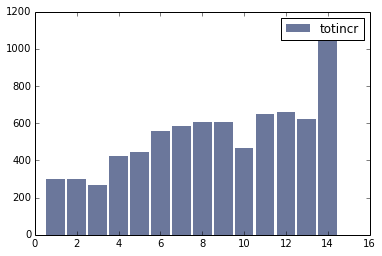

In [39]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

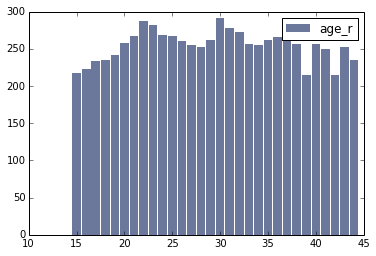

In [40]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

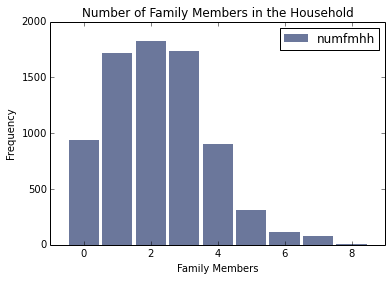

In [41]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show(xlabel='Family Members', ylabel='Frequency',title='Number of Family Members in the Household')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

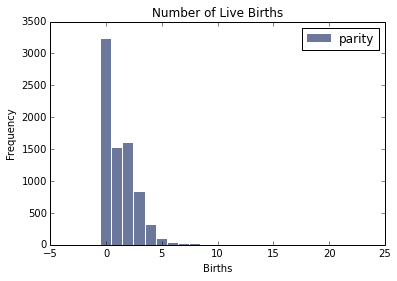

In [42]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show(xlabel='Births', ylabel='Frequency',title='Number of Live Births')

The data's mode is 0, meaning that there are large number of missing data or unborn babies. If excluding 0, the mode is at 2 babies.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [43]:
for babies, freq in hist.Largest(10):
        print "Number of Babies:", babies, "Frequency: ",freq

Number of Babies: 22 Frequency:  1
Number of Babies: 16 Frequency:  1
Number of Babies: 10 Frequency:  3
Number of Babies: 9 Frequency:  2
Number of Babies: 8 Frequency:  8
Number of Babies: 7 Frequency:  15
Number of Babies: 6 Frequency:  29
Number of Babies: 5 Frequency:  95
Number of Babies: 4 Frequency:  309
Number of Babies: 3 Frequency:  828


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

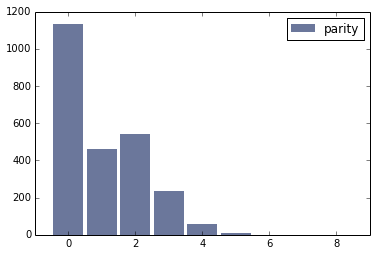

In [44]:
#People who earn more than $50k are included in the rich
rich = resp[resp.totincr>=12]
others = resp[resp.totincr<12]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show()

Find the largest parities for high income respondents.

In [45]:
for babies, freq in hist.Largest(7):
        print "Number of Babies:", babies, "Frequency: ",freq

Number of Babies: 8 Frequency:  1
Number of Babies: 7 Frequency:  1
Number of Babies: 5 Frequency:  11
Number of Babies: 4 Frequency:  60
Number of Babies: 3 Frequency:  233
Number of Babies: 2 Frequency:  540
Number of Babies: 1 Frequency:  463


For the Rich, the maximum number of kids bourne by mothers end at 8 per mother. Also, the number of female with more than 4 kids fall really fast. Whereas, for the Poor, the  number falls slowly.

Compare the mean <tt>parity</tt> for high income respondents and others.

In [46]:
print "Rich", rich.parity.mean()
print "Others", others.parity.mean()

Rich 1.04547316673
Others 1.30661284121


Investigate any other variables that look interesting.

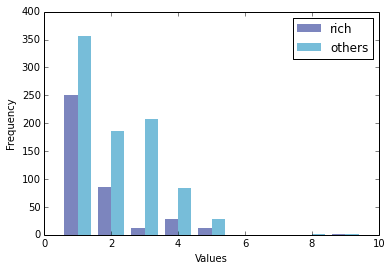

In [47]:
"""bc12pay11 looks at how a method of birth control or a prescription for a method was paid.
1	INSURANCE 
2	CO-PAYMENT, OR OUT-OF-POCKET PAYMENT
3	MEDICAID
4	NO PAYMENT REQUIRED
5	SOME OTHER WAY
"""
hist1 = thinkstats2.Hist(rich.bc12pay11)
hist2 = thinkstats2.Hist(others.bc12pay11)

width = 0.40
thinkplot.PrePlot(2)
thinkplot.Hist(hist1, align='right', width=width, label='rich')
thinkplot.Hist(hist2, align='left', width=width, label='others')
thinkplot.Show(xlabel='Values', ylabel='Frequency')

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [48]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

first = live[live.birthord == 1]
other = live[live.birthord != 1]
first_mean = live[live.birthord == 1].totalwgt_lb.mean()
other_mean = live[live.birthord != 1].totalwgt_lb.mean()

cohen_d = thinkstats2.CohenEffectSize(first.totalwgt_lb, other.totalwgt_lb)
print "First Born Mean: ",first_mean, " ", "Not First Born Mean: ",other_mean
print "Cohen's d ", cohen_d


First Born Mean:  7.20109443044   Not First Born Mean:  7.32585561497
Cohen's d  -0.0886729270726


"\nfirst_born_wgt = preg.totalwgt_lb[preg.birthord==1]\nhist = thinkstats2.Hist(first_born_wgt)\nthinkplot.Hist(hist, label='First Born')\nthinkplot.Show()\n"

First babies are lighter by 0.124761185 pounds although they are born 13.110260 hours later than others.